In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
Enter_year = 1992
bias_data_loc = "F:\DG\Era5Land\\" + str(Enter_year) + "\\Bias.csv"
df_bias = pd.read_csv(bias_data_loc)
df_bias

,year,jd1,jd2,obs_period(days),gm(10^6)m3,T_mean,T_mean_Era,Bias
0,1992,214,229,16,0.67,8.6,7.050877,1.549123
1,1992,230,244,15,0.60,8.6,7.152522,1.447478
2,1992,245,259,15,0.33,7.3,4.968830,2.331170
3,1992,260,274,15,0.33,5.3,2.192828,3.107172


In [3]:
loc_t_lr = "F:\DG\Era5Land\\" + str(Enter_year) + "\\Hourly_T_lr.csv"
df_T_lr = pd.read_csv(loc_t_lr)
df_T_lr.head(3)

,Julian day,Date,"30.7,79.8","30.7,79.9","30.7,80.0","30.6,79.8","30.6,79.9","30.6,80.0","30.5,79.8","30.5,79.9","30.5,80.0",LapseRate,Moving_average_lapse_rate,continuous_day,T_4200
0,153.01,1992-06-02 0:00:00,-4.756357,-5.748954,-8.592992,-2.707805,-6.542094,-9.719344,-3.604193,-8.127199,-9.454182,5.672593,6.340884,153.041667,-4.222418
1,153.02,1992-06-02 1:00:00,-4.317549,-5.439208,-8.145971,-2.339394,-6.057528,-9.306348,-3.015205,-7.438482,-8.783064,6.192403,6.308392,153.083333,-3.786346
2,153.03,1992-06-02 2:00:00,-1.926399,-2.840386,-5.108342,0.390835,-3.369537,-6.361408,0.013038,-4.447784,-6.389567,5.704630,6.250140,153.125000,-1.400101


In [4]:
df_histo = pd.read_csv('F:\DG\dg_histo_debris_covered.csv')  #from DEM
df_histo

,Elevation (m),Area (in km^2)
0,4250,0.066466
1,4350,0.441675
2,4450,0.583183
3,4550,0.603551
4,4650,0.549950
5,4750,0.154372
6,4850,0.159732


In [5]:
elevation = df_histo['Elevation (m)']
area = df_histo['Area (in km^2)']


## Finding Pdd

In [6]:
area_weighted_pdd = []
for i in range(len(df_bias.index)):  #number of time intervals is 5
    areaXpdd = []   # for each time interval, area*pdd for different elevations of the histogram
    for a, z in zip(area, elevation):  
        y = list(df_T_lr['Julian day']).index(df_bias['jd2'][i] + 1.01) #indices of starting and ending day
        x = list(df_T_lr['Julian day']).index(df_bias['jd1'][i] + .01)
        temp_at_z = list(df_T_lr['Moving_average_lapse_rate'][x:y]*(4284.205724 - z )/1000 + df_T_lr['30.7,79.8'][x:y] + df_bias['Bias'][i])
        PDD = sum([s for s in temp_at_z if s > 0]) / 24 
        areaXpdd.append(PDD*a)
    area_weighted_pdd.append(sum(areaXpdd)/sum(area))

df_bias['pdd_area_weighted'] = area_weighted_pdd
df_bias

,year,jd1,jd2,obs_period(days),gm(10^6)m3,T_mean,T_mean_Era,Bias,pdd_area_weighted
0,1992,214,229,16,0.67,8.6,7.050877,1.549123,113.037146
1,1992,230,244,15,0.60,8.6,7.152522,1.447478,105.778837
2,1992,245,259,15,0.33,7.3,4.968830,2.331170,86.463719
3,1992,260,274,15,0.33,5.3,2.192828,3.107172,57.985978


## Frequency distribution of Debris

In [7]:
df_freq = pd.read_csv('F:\DG\dg_debris_freq_distribution.csv')

In [8]:
debris_thickness = df_freq['Debris thickness (cm)']
freq = df_freq['Frequency']
df_freq.head(4)

,Debris thickness (cm),Frequency
0,5,0.143206
1,15,0.123224
2,25,0.121226
3,35,0.084369


## Finding Total melt

In [9]:
total_melts1 = [] #contains total melts for 5 periods
for i in range(len(df_bias.index)):
    melts_for_1 = [] #contains melts for 1 time interval for each debris band
    for d, fr in zip(debris_thickness, freq):
        TF1 = 5.84
        TF1_uncer = 0.06
        TF2 = -0.38
        TF2_uncer = 0.004
        melts_for_1.append(((TF1  + random.uniform(-TF1_uncer, TF1_uncer))* area_weighted_pdd[i]*d**(TF2 +random.uniform(-TF2_uncer, TF2_uncer)))*fr*2.56/1000)
    total_melts1.append(sum(melts_for_1))
df_bias['model 1 gm'] = total_melts1

In [10]:
total_melts2 = [] #contains total melts for 5 periods
for i in range(len(df_bias.index)):
    melts_for_1 = [] #contains melts for 1 time interval for each debris band
    for d, fr in zip(debris_thickness, freq):
        DDF = 5.1
        DDF_uncer = 0.05
        d0 = 12.19
        d0_uncer = 0.13
        melts_for_1.append(((DDF+random.uniform(-DDF_uncer, DDF_uncer)) *area_weighted_pdd[i]/(1+d/(d0+random.uniform(-d0_uncer, d0_uncer))))*fr*2.56/1000)
    total_melts2.append(sum(melts_for_1))
df_bias['model 2 gm'] = total_melts2

In [11]:
total_melts3 = [] #contains total melts for 5 periods
for i in range(len(df_bias.index)):
    melts_for_1 = [] #contains melts for 1 time interval for each debris band
    for d, fr in zip(debris_thickness, freq):
        DDF = 4.4
        DDF_uncer = 0.04
        d0 = 6.83
        d0_uncer = 0.08
        a = 0.37
        a_uncer = 0.08
        melts_for_1.append(((DDF+random.uniform(-DDF_uncer, DDF_uncer)) * area_weighted_pdd[i] / ((1 + (d /(d0+random.uniform(-d0_uncer, d0_uncer))) ** 2) **(a+random.uniform(-a_uncer, a_uncer))))*fr*2.56/1000)
    total_melts3.append(sum(melts_for_1))
df_bias['model 3 gm'] = total_melts3

In [12]:
df_bias.to_csv("F:\DG\Era5Land\\" + str(Enter_year) + "\\Total_melt.csv")

In [13]:
julian_day_intervals = []
for i, j in zip(df_bias['jd1'], df_bias['jd2']):
    julian_day_intervals.append(str(i) + '-' + str(j))

In [14]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

Text(0, 0.5, 'Total melt in (10^6)m^3')

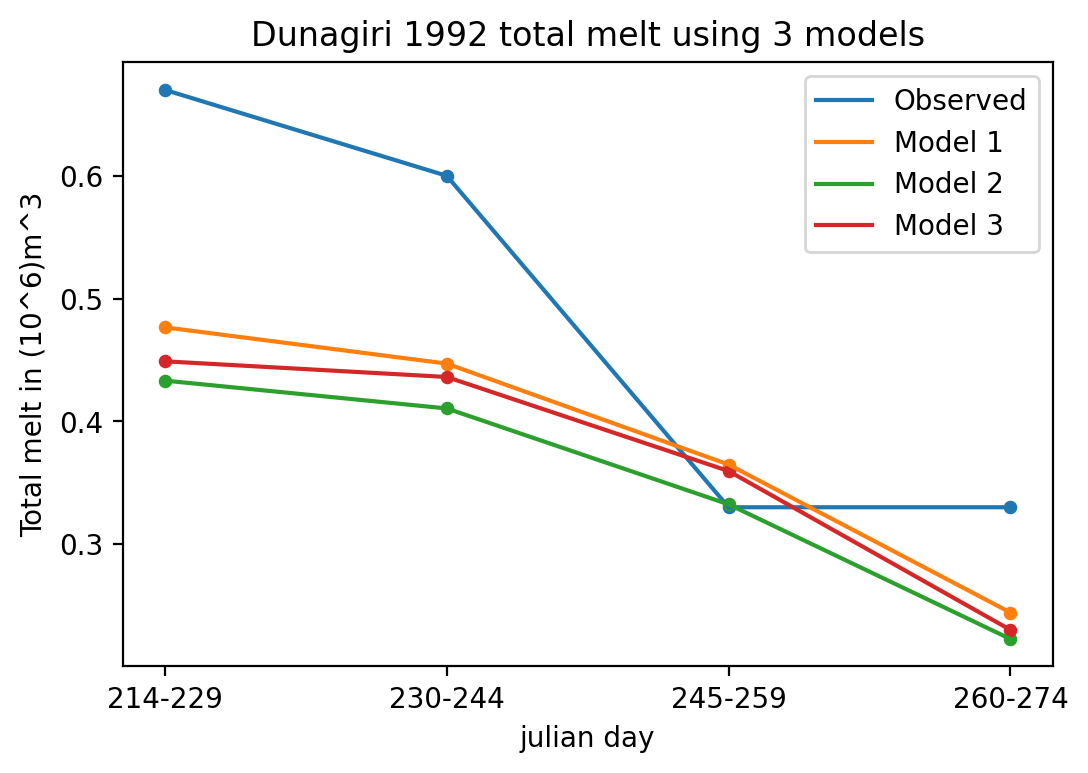

In [15]:
plt.plot(julian_day_intervals, df_bias['gm(10^6)m3'], label ='Observed')
plt.scatter(julian_day_intervals, df_bias['gm(10^6)m3'], s = 15)
plt.plot(julian_day_intervals, total_melts1, label ='Model 1')
plt.scatter(julian_day_intervals, total_melts1, s = 15)
plt.plot(julian_day_intervals, total_melts2, label ='Model 2')
plt.scatter(julian_day_intervals, total_melts2, s = 15)
plt.plot(julian_day_intervals, total_melts3, label ='Model 3')
plt.scatter(julian_day_intervals, total_melts3, s = 15)

plt.legend()
plt.title('Dunagiri {} total melt using 3 models'.format(Enter_year))
plt.xlabel('julian day')
plt.ylabel('Total melt in (10^6)m^3')

### Calulating RMSE

In [16]:
#for model 1
sqd_1 = []
for i, j in zip(df_bias['gm(10^6)m3'], total_melts1):
    sqd_1.append((i-j)**2)
print('RMSE_1 =', (sum(sqd_1)/len(sqd_1))**0.5)

#for model 2
sqd_2 = []
for i, j in zip(df_bias['gm(10^6)m3'], total_melts2):
    sqd_2.append((i-j)**2)
print('RMSE_2 =', (sum(sqd_2)/len(sqd_2))**0.5)

#for model 3
sqd_3 = []
for i, j in zip(df_bias['gm(10^6)m3'], total_melts3):
    sqd_3.append((i-j)**2)
print('RMSE_3 =', (sum(sqd_3)/len(sqd_3))**0.5)



RMSE_1 = 0.13170664742949653
RMSE_2 = 0.16087753706794836
RMSE_3 = 0.14713012638882444
